```markdown
# 라이브러리 임포트

필요한 라이브러리를 불러옵니다.
```


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

```markdown
# (1) 데이터 가져오기

`sklearn.datasets`의 `load_diabetes`에서 데이터를 가져옵니다.
```

In [22]:
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

```markdown
# (2) 모델에 입력할 데이터 X 준비하기

`df_X`에 있는 값들을 numpy array로 변환합니다. 이미 `numpy.ndarray` 타입이므로 이 단계는 사실상 필요 없습니다.
```

In [23]:
df_X = np.array(df_X)
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

```markdown
# (3) 모델에 예측할 데이터 y 준비하기

`df_y`에 있는 값들을 numpy array로 변환합니다. 이미 `numpy.ndarray` 타입이므로 이 단계는 사실상 필요 없습니다.
```

In [24]:
df_y = np.array(df_y)
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

```markdown
# (4) train 데이터와 test 데이터로 분리하기

`train_test_split` 함수를 사용하여 훈련, 테스트 세트를 8:2의 비율로 분할합니다.
```

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

```markdown
# (5) 선형 회귀 모델 정의하기

선형 회귀 모델을 정의합니다.
```


In [32]:
def model(X, W, b):
    """
    선형 회귀 모델
    :param X: 입력 데이터 (N x 10 array)
    :param W: 가중치 벡터 (10-element array)
    :param b: 절편 (scalar)
    :return: 예측값 (N-element array)
    """
    predictions = X.dot(W) + b
    return predictions


```markdown
# (6) 손실함수 loss 정의하기

평균 제곱 오차(MSE)를 계산하는 함수를 정의합니다.
```

In [33]:
def MSE(a, b):
    """
    평균 제곱 오차를 계산하는 함수
    :param a: 예측값 (N-element array)
    :param b: 실제값 (N-element array)
    :return: 평균 제곱 오차 (scalar)
    """
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    """
    손실 함수를 계산하는 함수
    :param X: 입력 데이터 (N x 10 array)
    :param W: 가중치 벡터 (10-element array)
    :param b: 절편 (scalar)
    :param y: 실제값 (N-element array)
    :return: 손실 값 (scalar)
    """
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

```markdown
# (7) 기울기를 구하는 gradient 함수 구현하기

경사 하강법을 위한 그래디언트를 계산하는 함수를 정의합니다.
```

In [34]:
def gradient(X, W, b, y):
    """
    경사 하강법을 위한 그래디언트를 계산하는 함수
    :param X: 입력 데이터 (N x 10 array)
    :param W: 가중치 벡터 (10-element array)
    :param b: 절편 (scalar)
    :param y: 실제값 (N-element array)
    :return: 가중치와 절편에 대한 그래디언트 (dW, db)
    """
    N = len(y)  # 데이터 포인트의 개수
    y_pred = model(X, W, b)  # 예측값 계산

    # 가중치 W에 대한 그래디언트 계산
    dW = 1/N * X.T.dot(y_pred - y)
    # 절편 b에 대한 그래디언트 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



```markdown
# (8) 하이퍼 파라미터인 학습률 설정하기

학습률을 설정합니다.
```

In [35]:
LEARNING_RATE = 0.05

```markdown
# (9) 모델 학습하기

모델을 학습하고 손실 값을 저장합니다.
```

In [36]:
# 가중치와 절편 초기화
W = np.random.randn(X_train.shape[1])
b = 0.0

losses = []
MAX_ITER = 10000

for i in range(1, MAX_ITER + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # iteration마다 loss값 확인하기
    if i % 100 == 0:
        print('Iteration %d : Loss %.4f' % (i, L))


Iteration 100 : Loss 5871.3150
Iteration 200 : Loss 5694.4863
Iteration 300 : Loss 5530.9552
Iteration 400 : Loss 5379.6256
Iteration 500 : Loss 5239.4943
Iteration 600 : Loss 5109.6436
Iteration 700 : Loss 4989.2335
Iteration 800 : Loss 4877.4949
Iteration 900 : Loss 4773.7242
Iteration 1000 : Loss 4677.2771
Iteration 1100 : Loss 4587.5636
Iteration 1200 : Loss 4504.0437
Iteration 1300 : Loss 4426.2225
Iteration 1400 : Loss 4353.6472
Iteration 1500 : Loss 4285.9027
Iteration 1600 : Loss 4222.6086
Iteration 1700 : Loss 4163.4167
Iteration 1800 : Loss 4108.0075
Iteration 1900 : Loss 4056.0884
Iteration 2000 : Loss 4007.3911
Iteration 2100 : Loss 3961.6694
Iteration 2200 : Loss 3918.6976
Iteration 2300 : Loss 3878.2687
Iteration 2400 : Loss 3840.1928
Iteration 2500 : Loss 3804.2953
Iteration 2600 : Loss 3770.4163
Iteration 2700 : Loss 3738.4086
Iteration 2800 : Loss 3708.1373
Iteration 2900 : Loss 3679.4782
Iteration 3000 : Loss 3652.3173
Iteration 3100 : Loss 3626.5497
Iteration 3200 : 

```markdown
# (10) test 데이터에 대한 성능 확인하기

테스트 데이터를 사용하여 모델의 성능을 평가합니다.
```

In [45]:
prediction = model(X_test, W, b)
test_loss = loss(X_test, W, b, y_test)

print("Test Loss: ", test_loss)

Test Loss:  2881.96748078836


```markdown
# (11) 결과 시각화하기

학습 과정에서의 손실 값을 그래프로 시각화합니다.


 - 실제값과 예측값을 그래프로 시각화
```

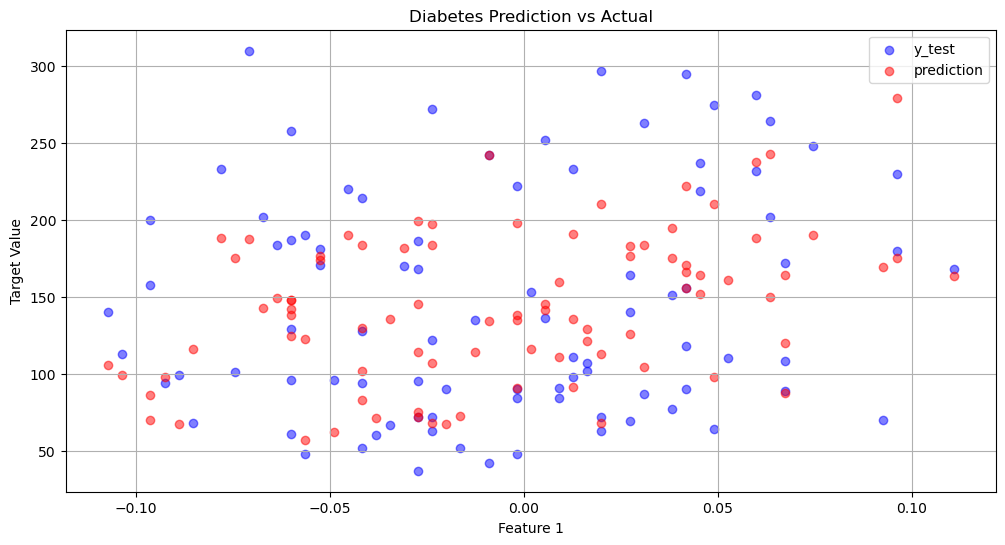

In [43]:
plt.figure(figsize=(12, 6))

plt.scatter(X_test[:, 0], y_test, label="y_test", color='blue', alpha=0.5)
plt.scatter(X_test[:, 0], prediction, label="prediction", color='red', alpha=0.5)

plt.xlabel("Feature 1")
plt.ylabel("Target Value")
plt.title("Diabetes Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.show()


```markdown
 - 손실 함수의 변화 그래프로 시각화
```

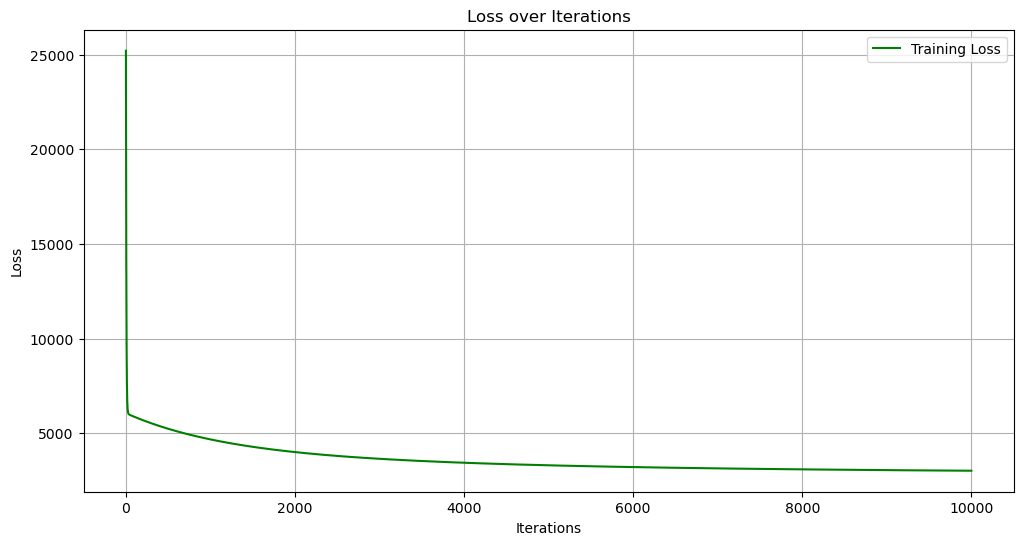

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(losses, label='Training Loss', color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()